# Relative $R$-value for British variant (B.1.1.7) of SARS-CoV-2

In [108]:
using DataFrames, Plots, GLM, StatsBase

🇩🇰 weekly data, starting from week 49 in 2020, and continuing into 2021. $n$ is the number of sequenced positive tests with definite outcome and $x$ is the number identified as the 🇬🇧 variant (B.1.1.7)

In [109]:
df_B117Data = DataFrame(
   Week     = ["Week 49", "Week 50","Week 51","Week 52","Week 53","Week 01","Week 02","Week 03"], 
    n       = [    1840,     2380,    2976,    2917,    2863,    3141, 3022,     1715],
    x       = [       3,      10,       23,      60,      68,     126,  224,      231])

,Week,n,x
,String,Int64,Int64
1,Week 49,1840,3
2,Week 50,2380,10
3,Week 51,2976,23
4,Week 52,2917,60
5,Week 53,2863,68
6,Week 01,3141,126
7,Week 02,3022,224
8,Week 03,1715,231


In [110]:
# Compute and insert ratios and corresponding standard errors
insertcols!(df_B117Data, 4, q = df_B117Data.x ./ df_B117Data.n)
insertcols!(df_B117Data, 5, σ = sqrt.(q.*(1 .-q) ./ df_B117Data.n) )

,Week,n,x,q,σ
,String,Int64,Int64,Float64,Float64
1,Week 49,1840,3,0.00163043,0.000940564
2,Week 50,2380,10,0.00420168,0.00132589
3,Week 51,2976,23,0.00772849,0.00160526
4,Week 52,2917,60,0.0205691,0.002628
5,Week 53,2863,68,0.0237513,0.00284586
6,Week 01,3141,126,0.0401146,0.00350128
7,Week 02,3022,224,0.0741231,0.00476547
8,Week 03,1715,231,0.134694,0.00824379


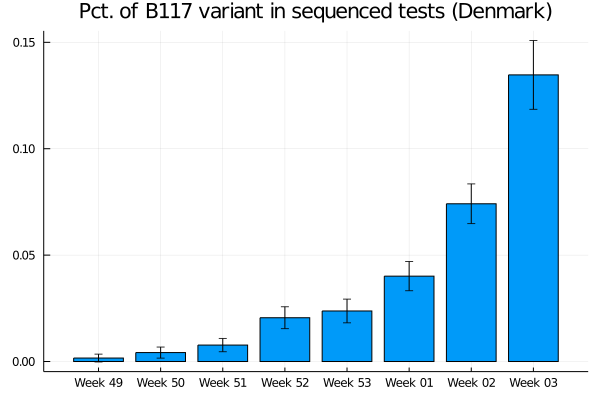

In [111]:
bar( df_B117Data.q, legend=false, xticks = (1:8, df_B117Data.Week), 
      title="Pct. of B117 variant in sequenced tests (Denmark)",
     yerror=1.96.*df_B117Data.σ)

In [112]:
#Add column with time trend for glm estimation
insertcols!(df_B117Data, 6, tt = collect(1:size(df_B117Data,1)) )

,Week,n,x,q,σ,tt
,String,Int64,Int64,Float64,Float64,Int64
1,Week 49,1840,3,0.00163043,0.000940564,1
2,Week 50,2380,10,0.00420168,0.00132589,2
3,Week 51,2976,23,0.00772849,0.00160526,3
4,Week 52,2917,60,0.0205691,0.002628,4
5,Week 53,2863,68,0.0237513,0.00284586,5
6,Week 01,3141,126,0.0401146,0.00350128,6
7,Week 02,3022,224,0.0741231,0.00476547,7
8,Week 03,1715,231,0.134694,0.00824379,8


In [113]:
glmb117 = fit(GeneralizedLinearModel, @formula(x / n ~ tt), df_B117Data, wts = df_B117Data.n, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

:(x / n) ~ 1 + tt

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       z  Pr(>|z|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -6.53348   0.165779   -39.41    <1e-99  -6.85841   -6.20856
tt            0.57725   0.0250546   23.04    <1e-99   0.528144   0.626356
─────────────────────────────────────────────────────────────────────────

The point estimate for $\gamma$ is:|

In [120]:
λ̂ = exp(coef(glmb117)[1]) 
γ̂ = exp(coef(glmb117)[2])

1.7811338297136707

Corresponding 95% confidence interval for $\gamma$ is:

In [115]:
exp.(confint(glmb117)[2,1:2])'

1×2 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 1.69578  1.87078

For a generation time of 4.7 days, we have $\hat\gamma=$

In [116]:
print( "For GT=4.7days:     γ̂=", exp(4.7/7*coef(glmb117)[2])," and CI 95%: ", exp.((4.7/7).* confint(glmb117)[2,1:2])')

For GT=4.7days:     γ̂=1.473414122036624 and CI 95%: [1.4256259801352662 1.52280416130672]

Per day...

In [117]:
print( "Per day:     γ̂=", exp(1/7*coef(glmb117)[2])," and CI 95%: ", exp.((1/7).* confint(glmb117)[2,1:2])')

Per day:     γ̂=1.0859599108823121 and CI 95%: [1.0783683905039319 1.0936048742048317]

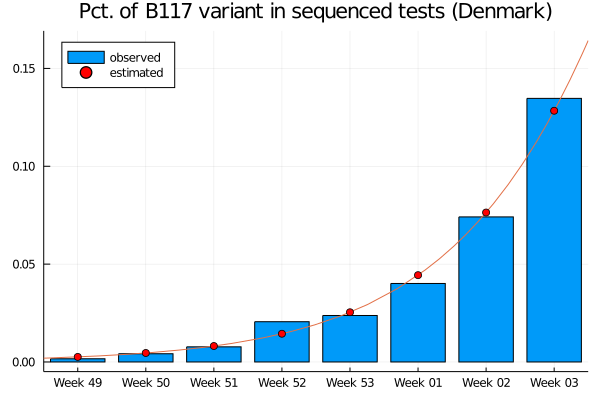

In [160]:
bar( df_B117Data.q, legend = :topleft, label= "observed", xticks = (1:8, df_B117Data.Week), 
      title="Pct. of B117 variant in sequenced tests (Denmark)")
plot!(t -> 1/(1+exp(-log(λ̂) - t*log(γ̂))),label = :none, xlims = (0.5,8.5))
x = [i for i in 1:size(df_B117Data,1)]
y = 1 ./ (1 .+ exp.(-log(λ̂) .- log(γ̂).* x)) 
scatter!(x, y ,label = "estimated", xlims = (0.5,8.5), color=:red)